<h1 align=center><font size = 6>Moving to Melbourne - Capstone Project</font></h1>

# Introduction

In this project, I will attempt to use K-means Clustering along with Data sourcing and analysis to develop a model that can be used to identify the best neighborhoods to live in within Melbourne, Australia. The decision will be based using Multi-tier selection criteria based on several pre-defined factors according to my preferences. within this project, I will collect data from trusted sources of the Australian government and I will also use the Foursquare API to explore the neighborhoods in Melbourne. My decision when choosing the neighborhood to live in shall be based on the following factors:  
1. I want the neighborhood I live in to have a nearby hospital with emergency care in case an emergency occurs.
2. I want the neighborhood I live in to have a selection of highly rated primary schools for enrolling my kids.
3. I want the neighborhood I choose to live in not to be densely neither sparsely populated, preferably between 1000 and 3000 people per Square Kilometer.
4. I want the neighborhood I live in to have a variety of venues and recreational locations that serve the essential needs such as supermarkets and convenience stores, recreational parks and playgrounds,  ………………………….


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Collecting the Hospitals Data</a> 

2. <a href="#item2">Collecting the Schools Data</a>

3. <a href="#item3">Collecting The list of Neighborhoods and Cities Data</a>
    
4. <a href="#item4">Adding the Population Data to the list of Neighborhoods</a>

5. <a href="#item5">Finding the list of Venues within each Neighborhood</a> 

6. <a href="#item6">Analyze Each Neighborhood</a>
    
7. <a href="#item7">Cluster The Neighborhoods</a>
    
8. <a href="#item8">Examine The Clusters</a>    

</font>
</div>

We start by downloading the Necessary Libraries for this Project.

In [2]:
import pandas as pd
!pip install lxml
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print('Importing Pandas is Completed')

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
print('Importing Geopy is Completed')

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library
print('Importing Folium is Completed')

import numpy as np # library to handle data in a vectorized manner

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import matplotlib.colors as colors

# import tools from SKLEARN
import sklearn.utils
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler

print('Importing Other Libraries is Completed')

Importing Pandas is Completed
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction

<a id='item1'></a>

# 1. Collecting The Hospitals Data

Start by reading the Hospital Data collected from the Department of Health of the State of Victoria, into a Pandas Dataframe.

In [3]:
Hospital_data = pd.read_csv("MainHospitalList.csv")

In [4]:
Hospital_data.head()

,Hospital ID,Formal Name,Other Name,Emergency Capable,Location Address,Suburb,Postcode,Access Point,Category,Agency Type
0,5488,Albert Road Clinic,Albert Road Clinic,NO,31-33 Albert Road,South Melbourne,3205,NaN,PRIVATE,Private Hospital
1,3485,Albury Wodonga Health,Albury Wodonga Health,YES,69 Vermont Street,Wodonga,3690,NaN,PUBLIC,Public Hospital
2,12990,"Albury Wodonga Health, Albury Campus","Albury Wodonga Health, Albury Campus",YES,Borella,Albury,2640,NaN,PUBLIC,Public Hospital
3,3491,Alexandra District Health,Alexandra District Health,NO,20 Cooper Street,Alexandra,3714,NaN,PUBLIC,Public Hospital
4,11519,Alfred Health,Alfred Health,NO,Commercial Road,Melbourne,3004,NaN,PUBLIC,Public Hospital


In [5]:
Hospital_data.shape

(271, 10)

let drop the Access Point Column since there is no data in the column.

In [6]:
Hospital_data.dropna(axis = 1 , inplace = True)

In [7]:
Hospital_data.head()

,Hospital ID,Formal Name,Other Name,Emergency Capable,Location Address,Suburb,Postcode,Category,Agency Type
0,5488,Albert Road Clinic,Albert Road Clinic,NO,31-33 Albert Road,South Melbourne,3205,PRIVATE,Private Hospital
1,3485,Albury Wodonga Health,Albury Wodonga Health,YES,69 Vermont Street,Wodonga,3690,PUBLIC,Public Hospital
2,12990,"Albury Wodonga Health, Albury Campus","Albury Wodonga Health, Albury Campus",YES,Borella,Albury,2640,PUBLIC,Public Hospital
3,3491,Alexandra District Health,Alexandra District Health,NO,20 Cooper Street,Alexandra,3714,PUBLIC,Public Hospital
4,11519,Alfred Health,Alfred Health,NO,Commercial Road,Melbourne,3004,PUBLIC,Public Hospital


According to my selection Criteria, I want the hospital in my neighborhood to be able to handle emergency cases. Therefore, I will drop any hospitals in the list that are Not emergency capable. 

In [8]:
Hospital_data = Hospital_data[Hospital_data['Emergency Capable'] != 'NO']
Hospital_data.head()

,Hospital ID,Formal Name,Other Name,Emergency Capable,Location Address,Suburb,Postcode,Category,Agency Type
1,3485,Albury Wodonga Health,Albury Wodonga Health,YES,69 Vermont Street,Wodonga,3690,PUBLIC,Public Hospital
2,12990,"Albury Wodonga Health, Albury Campus","Albury Wodonga Health, Albury Campus",YES,Borella,Albury,2640,PUBLIC,Public Hospital
6,3483,Angliss Hospital,Angliss Hospital,YES,Albert Street,Upper Ferntree Gully,3156,PUBLIC,Public Hospital
9,11733,Austin Health - Austin Hospital,Austin Health - Austin Hospital,YES,145 Studley Road,Heidelberg,3084,PUBLIC,Public Hospital
11,6272,Bairnsdale Regional Health Service,Bairnsdale Regional Health Service,YES,122 Day St,Bairnsdale,3875,PUBLIC,Public Hospital


In [9]:
Hospital_data.shape[0]

40

We have 40 Hospitals in total across Victoria that are emergency capable. we will now create a list of the postcodes of these hospitals to use when filtering the next piece of Data.

In [10]:
Hos_pos = Hospital_data['Postcode'].tolist()

<a id='item2'></a>

# 2. Collecting The Schools Data

We start by reading the School Data of Melbourne collected from the Better Education Online Platform into a Pandas Dataframe.

In [11]:
Schools_data = pd.read_html('https://bettereducation.com.au/school/Primary/vic/vic_top_primary_schools_by_city.aspx?city=Melbourne')

In [12]:
Schools_data=Schools_data[0]

In [13]:
Schools_data.head()

,School,Postcode,State Overall Score,English,Maths,Total Enrolments,Trend / Compare,ICSEA
0,"Presbyterian Ladies' College,Burwood,VIC,3125",3125,100,NaN,NaN,1429,Trend / Compare,1202.0
1,"Serpell Primary School,Templestowe,VIC,3106",3106,100,NaN,NaN,1176,Trend / Compare,1172.0
2,Haileybury College,3173,100,NaN,NaN,4054,Trend / Compare,1179.0
3,"Huntingtower School,Mount Waverley,VIC,3149",3149,100,NaN,NaN,711,Trend / Compare,1175.0
4,"Beverley Hills Primary School,Doncaster East,V...",3109,100,NaN,NaN,572,Trend / Compare,1165.0


Clean the Data by removing the state name and postcode from the name

In [14]:
y = Schools_data['School'].str.split(',VIC')
for i in Schools_data['School'].index:
    Schools_data['School'][i] = str(y[i][0])
Schools_data.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,School,Postcode,State Overall Score,English,Maths,Total Enrolments,Trend / Compare,ICSEA
0,"Presbyterian Ladies' College,Burwood",3125,100,NaN,NaN,1429,Trend / Compare,1202.0
1,"Serpell Primary School,Templestowe",3106,100,NaN,NaN,1176,Trend / Compare,1172.0
2,Haileybury College,3173,100,NaN,NaN,4054,Trend / Compare,1179.0
3,"Huntingtower School,Mount Waverley",3149,100,NaN,NaN,711,Trend / Compare,1175.0
4,"Beverley Hills Primary School,Doncaster East",3109,100,NaN,NaN,572,Trend / Compare,1165.0


Using the Hospital Postcode list created earlier, we can now filter the schools that have a common postcode with an Emergency capable hospital, and since the school list is that of Melbourne only, this step will eliminate any postcodes that are outside The Greater Melbourne Region.

In [15]:
for i in Schools_data['Postcode'].index:
    if Schools_data['Postcode'][i] in Hos_pos:
        print (Schools_data['Postcode'][i])
    else:
        Schools_data.drop(index = i , inplace = True)

3135
3004
3806
3030
3156
3004
3191
3084
3128
3030
3084
3806
3135
3084
3199
3121
3016
3016
3128
3191
3191
3084
3121
3084
3011
3016
3175
3011
3135


In [16]:
Schools_data.shape[0]

29

We have in Total 29 Schools that are within the same postcode of an Emergency Capable Hospital within Melbourne.

In [17]:
Schools_data

,School,Postcode,State Overall Score,English,Maths,Total Enrolments,Trend / Compare,ICSEA
42,"Tintern Grammar,Ringwood East",3135,99,NaN,NaN,812,Trend / Compare,1150.0
65,Melbourne Grammar School,3004,98,NaN,NaN,1795,Trend / Compare,1171.0
71,"St Margaret's School,Berwick",3806,98,NaN,NaN,746,Trend / Compare,1133.0
73,"Heathdale Christian College,Werribee",3030,98,NaN,NaN,1537,Trend / Compare,1140.0
101,Mountain Gate Primary School,3156,98,NaN,NaN,404,Trend / Compare,1050.0
113,"Wesley College,Melbourne",3004,97,NaN,NaN,3145,Trend / Compare,1159.0
114,Sandringham East Primary School,3191,97,NaN,NaN,534,Trend / Compare,1133.0
119,"Banyule Primary School,Rosanna",3084,97,NaN,NaN,691,Trend / Compare,1144.0
130,"Kingswood College,Box Hill",3128,97,NaN,NaN,582,Trend / Compare,1157.0
137,"Alamanda K-9 College,Point Cook",3030,97,NaN,NaN,2624,Trend / Compare,1113.0


Further Clean the Data by removing any unnecessary Columns and Re-setting the Index.

In [18]:
Schools_data.drop(columns = ['English' , 'Maths' , 'Trend / Compare' , 'ICSEA'] , axis = 1 , inplace = True)
Schools_data.reset_index(drop=True, inplace=True)
Schools_data

,School,Postcode,State Overall Score,Total Enrolments
0,"Tintern Grammar,Ringwood East",3135,99,812
1,Melbourne Grammar School,3004,98,1795
2,"St Margaret's School,Berwick",3806,98,746
3,"Heathdale Christian College,Werribee",3030,98,1537
4,Mountain Gate Primary School,3156,98,404
5,"Wesley College,Melbourne",3004,97,3145
6,Sandringham East Primary School,3191,97,534
7,"Banyule Primary School,Rosanna",3084,97,691
8,"Kingswood College,Box Hill",3128,97,582
9,"Alamanda K-9 College,Point Cook",3030,97,2624


We further sort the data by grouping the schools in the same postcode and finding the Average school rating per each postcode.

In [19]:
Avg_School_Rating = Schools_data.groupby('Postcode').mean()

In [20]:
Avg_School_Rating.sort_values('State Overall Score' , axis = 0, ascending = False , inplace=True)
Avg_School_Rating

,State Overall Score,Total Enrolments
Postcode,,
3156,98.000000,404.000000
3004,97.500000,2470.000000
3030,97.500000,2080.500000
3806,97.000000,836.500000
3199,96.000000,864.000000
3128,95.500000,459.500000
3135,95.333333,649.666667
3084,95.200000,592.800000
3191,94.333333,438.000000


We choose the Top 10 School Rated Postcodes as the preference list for the next step.

In [21]:
Top_10_schools = Avg_School_Rating[0:10]
Top_10_schools

,State Overall Score,Total Enrolments
Postcode,,
3156,98.000000,404.000000
3004,97.500000,2470.000000
3030,97.500000,2080.500000
3806,97.000000,836.500000
3199,96.000000,864.000000
3128,95.500000,459.500000
3135,95.333333,649.666667
3084,95.200000,592.800000
3191,94.333333,438.000000


In [22]:
Top_postcodes = Top_10_schools.index.tolist()

In [23]:
Top_postcodes

[3156, 3004, 3030, 3806, 3199, 3128, 3135, 3084, 3191, 3121]

<a id='item3'></a>

# 3. Collecting The list of Neighborhoods and Cities Data

We start by reading the list of Australian Postcodes with the Statistical Region name of Level 3 and 4 from the Australian Statistical Geography Standard. The list is read into a Pandas Dataframe.

In [24]:
Aus_data = pd.read_csv('australian_postcodes.csv')
Aus_data.head()

,id,postcode,locality,state,long,lat,dc,type,status,sa3,sa3name,sa4,sa4name
0,230,200,ANU,ACT,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21820,200,Australian National University,ACT,149.118900,-35.277700,NaN,NaN,Added 19-Jan-2020,NaN,NaN,NaN,NaN
2,232,800,DARWIN,NT,130.836680,-12.458684,NaN,NaN,Updated 6-Feb-2020,70101.0,Darwin City,701.0,Darwin
3,233,801,DARWIN,NT,130.836680,-12.458684,NaN,NaN,Updated 25-Mar-2020 SA3,70101.0,Darwin City,701.0,Darwin
4,234,804,PARAP,NT,130.873315,-12.428017,NaN,NaN,Updated 25-Mar-2020 SA3,70102.0,Darwin Suburbs,701.0,Darwin


lets take a look at the shape of our dataframe. 

In [25]:
Aus_data.shape

(18271, 13)

Out of 18271 postcodes, lets filter the list to include only the State of Victoria Postcodes

In [26]:
Mel_data = Aus_data[Aus_data.state == 'VIC']
Mel_data.head()

,id,postcode,locality,state,long,lat,dc,type,status,sa3,sa3name,sa4,sa4name
6099,4746,3000,MELBOURNE,VIC,144.956776,-37.817403,CITY DELIVERY CENTRE,Delivery Area,Updated 6-Feb-2020,20604.0,Melbourne City,206.0,Melbourne - Inner
6100,4747,3001,MELBOURNE,VIC,144.765920,-38.365017,CITY MAIL PROCESSING CENTRE,Post Office Boxes,Updated 25-Mar-2020 SA3,20605.0,Port Phillip,206.0,Melbourne - Inner
6101,4748,3002,EAST MELBOURNE,VIC,144.982207,-37.818517,CITY DELIVERY CENTRE,Delivery Area,Updated 6-Feb-2020,20604.0,Melbourne City,206.0,Melbourne - Inner
6102,4749,3003,WEST MELBOURNE,VIC,144.949592,-37.810871,CITY DELIVERY CENTRE,Delivery Area,Updated 6-Feb-2020,20604.0,Melbourne City,206.0,Melbourne - Inner
6103,4750,3004,MELBOURNE,VIC,144.970161,-37.844246,CITY DELIVERY CENTRE,Delivery Area,Updated 6-Feb-2020,20605.0,Port Phillip,206.0,Melbourne - Inner


In [27]:
Mel_data.shape

(3530, 13)

According to the Australian Statistical Geography Standard, the SA4 name includes is the name of the bigger regions within a given state. from our list, we choose to focus on the Regions within Melbourne only. 

In [28]:
Mel_data.dropna(subset=["sa4name"] , axis = 0 , inplace = True)

Mel_data.reset_index(drop=True, inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
Mel_data['sa4name'].unique()

array(['Melbourne - Inner', 'Melbourne - West', 'Melbourne - North West',
       'Melbourne - North East', 'Melbourne - Inner East',
       'Melbourne - Outer East', 'Melbourne - Inner South',
       'Melbourne - South East', 'Mornington Peninsula', 'Geelong',
       'Warrnambool and South West', 'South Australia - South East',
       'North West', 'Ballarat', 'Bendigo', 'Hume', 'Shepparton',
       'Latrobe - Gippsland'], dtype=object)

Filter the list that contains Melbourne within it's SA4 name.

In [30]:
Mel_data = Mel_data[Mel_data['sa4name'].str.contains('Melbourne')]
Mel_data.head()

,id,postcode,locality,state,long,lat,dc,type,status,sa3,sa3name,sa4,sa4name
0,4746,3000,MELBOURNE,VIC,144.956776,-37.817403,CITY DELIVERY CENTRE,Delivery Area,Updated 6-Feb-2020,20604.0,Melbourne City,206.0,Melbourne - Inner
1,4747,3001,MELBOURNE,VIC,144.765920,-38.365017,CITY MAIL PROCESSING CENTRE,Post Office Boxes,Updated 25-Mar-2020 SA3,20605.0,Port Phillip,206.0,Melbourne - Inner
2,4748,3002,EAST MELBOURNE,VIC,144.982207,-37.818517,CITY DELIVERY CENTRE,Delivery Area,Updated 6-Feb-2020,20604.0,Melbourne City,206.0,Melbourne - Inner
3,4749,3003,WEST MELBOURNE,VIC,144.949592,-37.810871,CITY DELIVERY CENTRE,Delivery Area,Updated 6-Feb-2020,20604.0,Melbourne City,206.0,Melbourne - Inner
4,4750,3004,MELBOURNE,VIC,144.970161,-37.844246,CITY DELIVERY CENTRE,Delivery Area,Updated 6-Feb-2020,20605.0,Port Phillip,206.0,Melbourne - Inner


In [31]:
Mel_data['sa4name'].unique()

array(['Melbourne - Inner', 'Melbourne - West', 'Melbourne - North West',
       'Melbourne - North East', 'Melbourne - Inner East',
       'Melbourne - Outer East', 'Melbourne - Inner South',
       'Melbourne - South East'], dtype=object)

In [32]:
Mel_data.shape[0]

747

A Total of 747 localities where found within Melbourne. This has to be further filtered according to our preferences. 

Drop the unnecessary columns. 

In [33]:
Mel_data.drop(columns = ['dc' , 'type' , 'status'] , axis = 1 , inplace = True)
Mel_data.head()

,id,postcode,locality,state,long,lat,sa3,sa3name,sa4,sa4name
0,4746,3000,MELBOURNE,VIC,144.956776,-37.817403,20604.0,Melbourne City,206.0,Melbourne - Inner
1,4747,3001,MELBOURNE,VIC,144.765920,-38.365017,20605.0,Port Phillip,206.0,Melbourne - Inner
2,4748,3002,EAST MELBOURNE,VIC,144.982207,-37.818517,20604.0,Melbourne City,206.0,Melbourne - Inner
3,4749,3003,WEST MELBOURNE,VIC,144.949592,-37.810871,20604.0,Melbourne City,206.0,Melbourne - Inner
4,4750,3004,MELBOURNE,VIC,144.970161,-37.844246,20605.0,Port Phillip,206.0,Melbourne - Inner


In [34]:
Mel_data.shape

(747, 10)

From the list of Postcodes generated from the school Data, find the list of Localities within Melbourne that share the same postcodes.

In [35]:
for i in Mel_data['postcode'].index:
    if Mel_data['postcode'][i] in Top_postcodes:
        print (Mel_data['postcode'][i])
    else:
        Mel_data.drop(index = i , inplace = True)

3004
3004
3030
3030
3030
3030
3030
3030
3030
3084
3084
3084
3084
3084
3121
3121
3121
3121
3121
3121
3121
3121
3128
3128
3128
3128
3128
3135
3135
3135
3156
3156
3156
3156
3156
3191
3806
3806


In [36]:
Mel_data.shape[0]

38

A Total of 38 Localities were found. let's take a look at the resulting dataframe. 

In [37]:
Mel_data["sa3"] = Mel_data["sa3"].astype("int")

In [38]:
Mel_data["sa4"] = Mel_data["sa4"].astype("int")

In [39]:
Mel_data

,id,postcode,locality,state,long,lat,sa3,sa3name,sa4,sa4name
4,4750,3004,MELBOURNE,VIC,144.970161,-37.844246,20605,Port Phillip,206,Melbourne - Inner
5,4751,3004,ST KILDA ROAD CENTRAL,VIC,144.970161,-37.844246,20605,Port Phillip,206,Melbourne - Inner
68,4809,3030,CHARTWELL,VIC,144.642090,-37.916240,21305,Wyndham,213,Melbourne - West
69,4810,3030,COCOROC,VIC,144.642090,-37.916240,21305,Wyndham,213,Melbourne - West
70,4811,3030,DERRIMUT,VIC,144.642090,-37.916240,21305,Wyndham,213,Melbourne - West
71,4812,3030,POINT COOK,VIC,144.642090,-37.916240,21305,Wyndham,213,Melbourne - West
72,4813,3030,QUANDONG,VIC,144.642090,-37.916240,21305,Wyndham,213,Melbourne - West
73,4814,3030,WERRIBEE,VIC,144.642090,-37.916240,21305,Wyndham,213,Melbourne - West
74,4815,3030,WERRIBEE SOUTH,VIC,144.642090,-37.916240,21305,Wyndham,213,Melbourne - West
199,4662,3084,BANYULE,VIC,145.082685,-37.744406,20901,Banyule,209,Melbourne - North East


From this Dataframe, we can generate a list of the SA3codes that can be later used to filter the SA2 neighborhoods within the preferred SA3 regions.

In [40]:
sa3codes = Mel_data['sa3'].unique().tolist()
sa3codes

[20605, 21305, 20901, 20607, 20703, 21103, 21202, 20801, 21203]

Lets take a look at the location of those SA3 Regions.

In [41]:
address = 'Melbourne, Australia'

geolocator = Nominatim(user_agent="Australia")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Melbourne are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Melbourne are -37.8142176, 144.9631608.


In [42]:
# create map of Melbourne using latitude and longitude values
Map_Melbourne = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, name, pc in zip(Mel_data['lat'], Mel_data['long'], Mel_data['sa3name'], Mel_data['postcode']):
    label = '{}, {}'.format(name, pc)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Map_Melbourne)  
    
Map_Melbourne

Next, we download the list of Neighborhoods known as SA2 Regions from the Australian Bureau of Statistics.

In [43]:
Neigh_data_raw = pd.read_csv('SA2_2016_AUST.csv')
Neigh_data_raw.head()

,SA2_MAINCODE_2016,SA2_5DIGITCODE_2016,SA2_NAME_2016,SA3_CODE_2016,SA3_NAME_2016,SA4_CODE_2016,SA4_NAME_2016,GCCSA_CODE_2016,GCCSA_NAME_2016,STATE_CODE_2016,STATE_NAME_2016,AREA_ALBERS_SQKM
0,101021007,11007,Braidwood,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,3418.3525
1,101021008,11008,Karabar,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,6.9825
2,101021009,11009,Queanbeyan,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,4.7634
3,101021010,11010,Queanbeyan - East,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,13.0034
4,101021011,11011,Queanbeyan Region,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,3054.4099


In [44]:
Neigh_data_raw.shape

(2310, 12)

We clean the Data frame to include only the neighbrohoods within Victoria State. 

In [45]:
Neigh_data_raw['STATE_NAME_2016'].unique()

array(['New South Wales', 'Victoria', 'Queensland', 'South Australia',
       'Western Australia', 'Tasmania', 'Northern Territory',
       'Australian Capital Territory', 'Other Territories'], dtype=object)

In [46]:
Neigh_data_raw = Neigh_data_raw[Neigh_data_raw['STATE_NAME_2016'] == 'Victoria']

In [47]:
Neigh_data_raw.shape[0]

464

We have a Total of 464 SA2 regions within Victoria. We further filter that to include only the Neighborhoods within the preferred SA3 regions generated earlier. 

In [48]:
for i in Neigh_data_raw['SA3_CODE_2016'].index:
    if Neigh_data_raw['SA3_CODE_2016'][i] in sa3codes:
        print (Neigh_data_raw['SA3_CODE_2016'][i])
    else:
        Neigh_data_raw.drop(index = i , inplace = True)

20605
20605
20605
20605
20605
20605
20605
20607
20607
20607
20607
20607
20607
20607
20703
20703
20703
20703
20703
20703
20703
20801
20801
20801
20801
20801
20801
20901
20901
20901
20901
20901
20901
20901
20901
20901
21103
21103
21103
21103
21103
21103
21103
21103
21202
21202
21202
21202
21202
21202
21202
21202
21202
21203
21203
21203
21203
21203
21203
21203
21203
21203
21203
21305
21305
21305
21305
21305
21305
21305
21305
21305
21305
21305
21305


In [49]:
Neigh_data_raw.shape[0]

75

A total of 75 SA2 regions where found.

Clean the Dataframe by renaming the Columns for ease of use.

In [50]:
Neigh_data_raw.rename(columns = {"SA2_MAINCODE_2016" : "Main_ID" , "SA2_5DIGITCODE_2016" : "ID" , "SA2_NAME_2016" : "Neighborhood" , 'SA3_CODE_2016' : 'sa3code' , 'SA3_NAME_2016' : 'Area' , 'SA4_NAME_2016' : 'Region' , 'STATE_NAME_2016' : 'State' , 'AREA_ALBERS_SQKM' : 'SQKM'} , inplace = True)


In [51]:
Neigh_data_raw.head()

,Main_ID,ID,Neighborhood,sa3code,Area,SA4_CODE_2016,Region,GCCSA_CODE_2016,GCCSA_NAME_2016,STATE_CODE_2016,State,SQKM
705,206051128,21128,Albert Park,20605,Port Phillip,206,Melbourne - Inner,2GMEL,Greater Melbourne,2,Victoria,4.6747
706,206051129,21129,Elwood,20605,Port Phillip,206,Melbourne - Inner,2GMEL,Greater Melbourne,2,Victoria,2.5530
707,206051130,21130,Port Melbourne,20605,Port Phillip,206,Melbourne - Inner,2GMEL,Greater Melbourne,2,Victoria,2.7894
708,206051131,21131,Port Melbourne Industrial,20605,Port Phillip,206,Melbourne - Inner,2GMEL,Greater Melbourne,2,Victoria,6.8694
709,206051132,21132,South Melbourne,20605,Port Phillip,206,Melbourne - Inner,2GMEL,Greater Melbourne,2,Victoria,2.4948


Drop the Unnecessary Columns

In [52]:
Neigh_data_raw.drop(columns = ['SA4_CODE_2016' , 'GCCSA_CODE_2016' , 'GCCSA_NAME_2016' , 'STATE_CODE_2016'] , axis = 1 , inplace = True)

Neigh_data_raw.reset_index(drop=True, inplace=True)

Our final Dataframe looks like this. 

In [53]:
Neigh_data_raw.head()

,Main_ID,ID,Neighborhood,sa3code,Area,Region,State,SQKM
0,206051128,21128,Albert Park,20605,Port Phillip,Melbourne - Inner,Victoria,4.6747
1,206051129,21129,Elwood,20605,Port Phillip,Melbourne - Inner,Victoria,2.5530
2,206051130,21130,Port Melbourne,20605,Port Phillip,Melbourne - Inner,Victoria,2.7894
3,206051131,21131,Port Melbourne Industrial,20605,Port Phillip,Melbourne - Inner,Victoria,6.8694
4,206051132,21132,South Melbourne,20605,Port Phillip,Melbourne - Inner,Victoria,2.4948


<a id='item4'></a>

# 4. Adding the Population Data to the list of Neighborhoods

We start by creating the required Columns in the list of Neighborhoods Generated above.

In [54]:
Population = pd.DataFrame({'Population' : [] , 'Median_age' : [] , 'Density' : []})
Population

,Population,Median_age,Density


In [55]:
Neigh_data_pop = Neigh_data_raw.append(Population)
Neigh_data_pop.head()

,Main_ID,ID,Neighborhood,sa3code,Area,Region,State,SQKM,Population,Median_age,Density
0,206051128.0,21128.0,Albert Park,20605.0,Port Phillip,Melbourne - Inner,Victoria,4.6747,NaN,NaN,NaN
1,206051129.0,21129.0,Elwood,20605.0,Port Phillip,Melbourne - Inner,Victoria,2.5530,NaN,NaN,NaN
2,206051130.0,21130.0,Port Melbourne,20605.0,Port Phillip,Melbourne - Inner,Victoria,2.7894,NaN,NaN,NaN
3,206051131.0,21131.0,Port Melbourne Industrial,20605.0,Port Phillip,Melbourne - Inner,Victoria,6.8694,NaN,NaN,NaN
4,206051132.0,21132.0,South Melbourne,20605.0,Port Phillip,Melbourne - Inner,Victoria,2.4948,NaN,NaN,NaN


Using the Australian Bureau of Statistics, we can read the Population data using the Url below and by utilizing the SA2 Main Code in the URL. From the population and the Area of the region, we can also calculate the Population Density of that region. 

In [56]:
for i in Neigh_data_pop['Main_ID'].index:
    url = 'https://quickstats.censusdata.abs.gov.au/census_services/getproduct/census/2016/quickstat/{}?opendocument'.format(Neigh_data_raw['Main_ID'][i])
    df = pd.read_html(url)[0]
    
    pop = int(df[1][0])
    age = int(df[1][3])
    den = round(pop / Neigh_data_pop['SQKM'][i] , 2)    
    
    Neigh_data_pop['Population'][i] = pop
    Neigh_data_pop['Median_age'][i] = age
    Neigh_data_pop['Density'][i] = den
    
    print(Neigh_data_pop['Neighborhood'][i])
    print('Population is ' + str(pop))
    print('Median Age is ' + str(age))
    print('Population Density is ' + str(den))
    print(' ')


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

Albert Park
Population is 15384
Median Age is 40
Population Density is 3290.91
 
Elwood
Population is 15222
Median Age is 35
Population Density is 5962.4
 
Port Melbourne
Population is 16163
Median Age is 40
Population Density is 5794.44
 
Port Melbourne Industrial
Population is 18
Median Age is 33
Population Density is 2.62
 
South Melbourne
Population is 11550
Median Age is 37
Population Density is 4629.63
 
St Kilda
Population is 26124
Median Age is 34
Population Density is 6696.74
 
St Kilda East
Population is 16417
Median Age is 33
Population Density is 6802.15
 
Abbotsford
Population is 8184
Median Age is 32
Population Density is 4702.1
 
Carlton North - Princes Hill
Population is 8428
Median Age is 33
Population Density is 3657.67
 
Collingwood
Population is 8513
Median Age is 32
Population Density is 6718.49
 
Fitzroy
Population is 10445
Median Age is 33
Population Density is 7579.83
 
Fitzroy North
Population is 12339
Median Age is 36
Population Density is 4925.55
 
Richmond (

The Dataframe looks like this

In [57]:
Neigh_data_pop.head()

,Main_ID,ID,Neighborhood,sa3code,Area,Region,State,SQKM,Population,Median_age,Density
0,206051128.0,21128.0,Albert Park,20605.0,Port Phillip,Melbourne - Inner,Victoria,4.6747,15384.0,40.0,3290.91
1,206051129.0,21129.0,Elwood,20605.0,Port Phillip,Melbourne - Inner,Victoria,2.5530,15222.0,35.0,5962.40
2,206051130.0,21130.0,Port Melbourne,20605.0,Port Phillip,Melbourne - Inner,Victoria,2.7894,16163.0,40.0,5794.44
3,206051131.0,21131.0,Port Melbourne Industrial,20605.0,Port Phillip,Melbourne - Inner,Victoria,6.8694,18.0,33.0,2.62
4,206051132.0,21132.0,South Melbourne,20605.0,Port Phillip,Melbourne - Inner,Victoria,2.4948,11550.0,37.0,4629.63


Lets sort the list in accordance to their population Density.

In [58]:
Neigh_data_pop.sort_values(by = 'Density' , ascending = False , axis = 0 , inplace = True)
Neigh_data_pop

,Main_ID,ID,Neighborhood,sa3code,Area,Region,State,SQKM,Population,Median_age,Density
10,206071142.0,21142.0,Fitzroy,20607.0,Yarra,Melbourne - Inner,Victoria,1.3780,10445.0,33.0,7579.83
6,206051134.0,21134.0,St Kilda East,20605.0,Port Phillip,Melbourne - Inner,Victoria,2.4135,16417.0,33.0,6802.15
9,206071141.0,21141.0,Collingwood,20607.0,Yarra,Melbourne - Inner,Victoria,1.2671,8513.0,32.0,6718.49
5,206051133.0,21133.0,St Kilda,20605.0,Port Phillip,Melbourne - Inner,Victoria,3.9010,26124.0,34.0,6696.74
1,206051129.0,21129.0,Elwood,20605.0,Port Phillip,Melbourne - Inner,Victoria,2.5530,15222.0,35.0,5962.40
2,206051130.0,21130.0,Port Melbourne,20605.0,Port Phillip,Melbourne - Inner,Victoria,2.7894,16163.0,40.0,5794.44
11,206071143.0,21143.0,Fitzroy North,20607.0,Yarra,Melbourne - Inner,Victoria,2.5051,12339.0,36.0,4925.55
12,206071144.0,21144.0,Richmond (Vic.),20607.0,Yarra,Melbourne - Inner,Victoria,6.2125,30499.0,33.0,4909.30
7,206071139.0,21139.0,Abbotsford,20607.0,Yarra,Melbourne - Inner,Victoria,1.7405,8184.0,32.0,4702.10
4,206051132.0,21132.0,South Melbourne,20605.0,Port Phillip,Melbourne - Inner,Victoria,2.4948,11550.0,37.0,4629.63


Lets filter the list to include the ones that are within our preferred range of Population Density (Between 1000 and 3000 people per SQKM)

In [59]:
for i in Neigh_data_pop['Density'].index:
    if 1000 < round(Neigh_data_pop['Density'][i] , 0) <= 3000:
        print (Neigh_data_pop['Neighborhood'][i])
        print (Neigh_data_pop['Density'][i])
        print(' ')
    else:
        Neigh_data_pop.drop(index = i , inplace = True)

Surrey Hills (East) - Mont Albert
2994.38
 
Box Hill
2827.72
 
Box Hill North
2827.0
 
Brighton East
2824.03
 
Hoppers Crossing - South
2777.9
 
Brighton (Vic.)
2767.51
 
Narre Warren - North East
2751.13
 
Point Cook - North
2730.08
 
Sandringham - Black Rock
2566.99
 
Werribee - East
2560.43
 
Blackburn
2484.05
 
Narre Warren South (West)
2476.46
 
Burwood
2430.54
 
Bundoora - East
2428.04
 
Burwood East
2409.81
 
Watsonia
2407.02
 
Endeavour Hills - South
2390.6
 
Heidelberg - Rosanna
2318.85
 
Beaumaris
2257.45
 
Ivanhoe
2255.49
 
Doveton
2176.99
 
Ringwood East
2156.95
 
Heidelberg West
2114.57
 
Narre Warren South (East)
2109.51
 
Lynbrook - Lyndhurst
2069.01
 
Cheltenham - Highett (West)
2056.09
 
Greensborough
2026.56
 
Ringwood North
2013.23
 
Croydon - West
1963.99
 
Cranbourne North
1963.98
 
Hampton Park - Lynbrook
1913.46
 
Croydon Hills - Warranwood
1894.75
 
Croydon - East
1874.74
 
Ivanhoe East - Eaglemont
1798.27
 
Viewbank - Yallambie
1787.77
 
Hoppers Crossing - Nort

Lets reset the index and look at our final count of Neighborhoods.

In [60]:
Neigh_data_pop.reset_index(drop=True, inplace=True)
Neigh_data_pop

,Main_ID,ID,Neighborhood,sa3code,Area,Region,State,SQKM,Population,Median_age,Density
0,207031167.0,21167.0,Surrey Hills (East) - Mont Albert,20703.0,Whitehorse - West,Melbourne - Inner East,Victoria,3.3279,9965.0,40.0,2994.38
1,207031163.0,21163.0,Box Hill,20703.0,Whitehorse - West,Melbourne - Inner East,Victoria,7.0120,19828.0,33.0,2827.72
2,207031164.0,21164.0,Box Hill North,20703.0,Whitehorse - West,Melbourne - Inner East,Victoria,6.2087,17552.0,38.0,2827.00
3,208011170.0,21170.0,Brighton East,20801.0,Bayside,Melbourne - Inner South,Victoria,5.6083,15838.0,43.0,2824.03
4,213051362.0,21362.0,Hoppers Crossing - South,21305.0,Wyndham,Melbourne - West,Victoria,7.0114,19477.0,36.0,2777.90
5,208011169.0,21169.0,Brighton (Vic.),20801.0,Bayside,Melbourne - Inner South,Victoria,8.2005,22695.0,45.0,2767.51
6,212021455.0,21455.0,Narre Warren - North East,21202.0,Casey - North,Melbourne - South East,Victoria,4.8740,13409.0,35.0,2751.13
7,213051465.0,21465.0,Point Cook - North,21305.0,Wyndham,Melbourne - West,Victoria,8.4906,23180.0,33.0,2730.08
8,208011173.0,21173.0,Sandringham - Black Rock,20801.0,Bayside,Melbourne - Inner South,Victoria,6.4301,16506.0,45.0,2566.99
9,213051467.0,21467.0,Werribee - East,21305.0,Wyndham,Melbourne - West,Victoria,7.7569,19861.0,35.0,2560.43


In [61]:
Neigh_data_pop.shape[0]

48

A total of 48 Neighborhoods that fit our selection criteria have been found. Next is to find the Geographical coordinates of our neighborhoods. 

In [62]:
lat_lng = pd.DataFrame({'Latitude' : [] , 'Longitude' : []})
lat_lng

,Latitude,Longitude


In [63]:
Neigh_data = Neigh_data_pop.append(lat_lng)
Neigh_data

,Main_ID,ID,Neighborhood,sa3code,Area,Region,State,SQKM,Population,Median_age,Density,Latitude,Longitude
0,207031167.0,21167.0,Surrey Hills (East) - Mont Albert,20703.0,Whitehorse - West,Melbourne - Inner East,Victoria,3.3279,9965.0,40.0,2994.38,NaN,NaN
1,207031163.0,21163.0,Box Hill,20703.0,Whitehorse - West,Melbourne - Inner East,Victoria,7.0120,19828.0,33.0,2827.72,NaN,NaN
2,207031164.0,21164.0,Box Hill North,20703.0,Whitehorse - West,Melbourne - Inner East,Victoria,6.2087,17552.0,38.0,2827.00,NaN,NaN
3,208011170.0,21170.0,Brighton East,20801.0,Bayside,Melbourne - Inner South,Victoria,5.6083,15838.0,43.0,2824.03,NaN,NaN
4,213051362.0,21362.0,Hoppers Crossing - South,21305.0,Wyndham,Melbourne - West,Victoria,7.0114,19477.0,36.0,2777.90,NaN,NaN
5,208011169.0,21169.0,Brighton (Vic.),20801.0,Bayside,Melbourne - Inner South,Victoria,8.2005,22695.0,45.0,2767.51,NaN,NaN
6,212021455.0,21455.0,Narre Warren - North East,21202.0,Casey - North,Melbourne - South East,Victoria,4.8740,13409.0,35.0,2751.13,NaN,NaN
7,213051465.0,21465.0,Point Cook - North,21305.0,Wyndham,Melbourne - West,Victoria,8.4906,23180.0,33.0,2730.08,NaN,NaN
8,208011173.0,21173.0,Sandringham - Black Rock,20801.0,Bayside,Melbourne - Inner South,Victoria,6.4301,16506.0,45.0,2566.99,NaN,NaN
9,213051467.0,21467.0,Werribee - East,21305.0,Wyndham,Melbourne - West,Victoria,7.7569,19861.0,35.0,2560.43,NaN,NaN


Now that we have created the Latitude and Longitude Columns in the Dataframe, we use the Geopy library to find the corresponding coordinates of each region.

In [64]:
for i in Neigh_data['Neighborhood'].index:
    address = str(Neigh_data['Neighborhood'][i] + ', Australia')
    geolocator = Nominatim(user_agent="Australia")
    location = geolocator.geocode(address)
    if(location != None):
        Neigh_data['Latitude'][i] = location.latitude
        Neigh_data['Longitude'][i] = location.longitude
    else:
        Neigh_data['Latitude'][i] = None
        Neigh_data['Longitude'][i] = None

    print(i)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47


Let's explore the data to find any missing values.

In [65]:
Neigh_data

,Main_ID,ID,Neighborhood,sa3code,Area,Region,State,SQKM,Population,Median_age,Density,Latitude,Longitude
0,207031167.0,21167.0,Surrey Hills (East) - Mont Albert,20703.0,Whitehorse - West,Melbourne - Inner East,Victoria,3.3279,9965.0,40.0,2994.38,-37.824118,145.098621
1,207031163.0,21163.0,Box Hill,20703.0,Whitehorse - West,Melbourne - Inner East,Victoria,7.0120,19828.0,33.0,2827.72,-37.813703,145.123805
2,207031164.0,21164.0,Box Hill North,20703.0,Whitehorse - West,Melbourne - Inner East,Victoria,6.2087,17552.0,38.0,2827.00,-37.805683,145.129575
3,208011170.0,21170.0,Brighton East,20801.0,Bayside,Melbourne - Inner South,Victoria,5.6083,15838.0,43.0,2824.03,-37.917173,145.016366
4,213051362.0,21362.0,Hoppers Crossing - South,21305.0,Wyndham,Melbourne - West,Victoria,7.0114,19477.0,36.0,2777.90,-37.883250,144.701102
5,208011169.0,21169.0,Brighton (Vic.),20801.0,Bayside,Melbourne - Inner South,Victoria,8.2005,22695.0,45.0,2767.51,-37.908196,144.995799
6,212021455.0,21455.0,Narre Warren - North East,21202.0,Casey - North,Melbourne - South East,Victoria,4.8740,13409.0,35.0,2751.13,-38.027657,145.303626
7,213051465.0,21465.0,Point Cook - North,21305.0,Wyndham,Melbourne - West,Victoria,8.4906,23180.0,33.0,2730.08,-37.906486,144.753306
8,208011173.0,21173.0,Sandringham - Black Rock,20801.0,Bayside,Melbourne - Inner South,Victoria,6.4301,16506.0,45.0,2566.99,-37.951481,145.002515
9,213051467.0,21467.0,Werribee - East,21305.0,Wyndham,Melbourne - West,Victoria,7.7569,19861.0,35.0,2560.43,-37.907848,144.642097


As Geopy could not find the address of some locations, those values are shown as NaN:

Index # 30  - Hampton Park - Lynbrook   
Index # 33  - Ivanhoe East - Eaglemont   
Index # 34  - Viewbank - Yallambie   

For these areas, I will get the Latitude and Longitude coordinates from Google and input them manually.

In [66]:
Neigh_data['Latitude'][30] = -38.0500
Neigh_data['Longitude'][30] = 145.2520
Neigh_data['Latitude'][33] = -37.7645
Neigh_data['Longitude'][33] = 145.0628
Neigh_data['Latitude'][34] = -37.7260
Neigh_data['Longitude'][34] = 145.1040

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [67]:
address = 'Melbourne, Australia'

geolocator = Nominatim(user_agent="Australia")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Melbourne are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Melbourne are -37.8142176, 144.9631608.


In [68]:
# create map of Melbourne using latitude and longitude values
Map_Melbourne = folium.Map(location=[latitude, longitude], zoom_start=10)

# add Neighborhood markers to map
for lat, lng, name, ind in zip(Neigh_data['Latitude'], Neigh_data['Longitude'], Neigh_data['Neighborhood'], Neigh_data['Area'].index):
    label = '{}, {}'.format(name, ind)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Map_Melbourne)  
    
Map_Melbourne

We immediately find an issue with the Latitude and Longitude values of the Neighborhoods:

Index # 12  - Burwood   
Index # 37  - Yarra - North   

For these areas, I will get the correct Latitude and Longitude coordinates through Google and input them manually.

In [69]:
Neigh_data['Latitude'][12] = -37.8495
Neigh_data['Longitude'][12] = 145.1090
Neigh_data['Latitude'][37] = -37.7979
Neigh_data['Longitude'][37] = 144.9887

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [70]:
# create map of Melbourne using latitude and longitude values
Map_Melbourne = folium.Map(location=[latitude, longitude], zoom_start=10)

# add Neighborhood markers to map
for lat, lng, name, ind in zip(Neigh_data['Latitude'], Neigh_data['Longitude'], Neigh_data['Neighborhood'], Neigh_data['Area'].index):
    label = '{}, {}'.format(name, ind)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Map_Melbourne)  
    
Map_Melbourne

Lets clean the data by keeping the columns required in the format required.

In [71]:
Neigh_data[["Main_ID" , "ID" , "sa3code" , "Population" , "Median_age"]] = Neigh_data[["Main_ID" , "ID" , "sa3code" , "Population" , "Median_age"]].astype("int")

In [72]:
Neigh_data

,Main_ID,ID,Neighborhood,sa3code,Area,Region,State,SQKM,Population,Median_age,Density,Latitude,Longitude
0,207031167,21167,Surrey Hills (East) - Mont Albert,20703,Whitehorse - West,Melbourne - Inner East,Victoria,3.3279,9965,40,2994.38,-37.824118,145.098621
1,207031163,21163,Box Hill,20703,Whitehorse - West,Melbourne - Inner East,Victoria,7.0120,19828,33,2827.72,-37.813703,145.123805
2,207031164,21164,Box Hill North,20703,Whitehorse - West,Melbourne - Inner East,Victoria,6.2087,17552,38,2827.00,-37.805683,145.129575
3,208011170,21170,Brighton East,20801,Bayside,Melbourne - Inner South,Victoria,5.6083,15838,43,2824.03,-37.917173,145.016366
4,213051362,21362,Hoppers Crossing - South,21305,Wyndham,Melbourne - West,Victoria,7.0114,19477,36,2777.90,-37.883250,144.701102
5,208011169,21169,Brighton (Vic.),20801,Bayside,Melbourne - Inner South,Victoria,8.2005,22695,45,2767.51,-37.908196,144.995799
6,212021455,21455,Narre Warren - North East,21202,Casey - North,Melbourne - South East,Victoria,4.8740,13409,35,2751.13,-38.027657,145.303626
7,213051465,21465,Point Cook - North,21305,Wyndham,Melbourne - West,Victoria,8.4906,23180,33,2730.08,-37.906486,144.753306
8,208011173,21173,Sandringham - Black Rock,20801,Bayside,Melbourne - Inner South,Victoria,6.4301,16506,45,2566.99,-37.951481,145.002515
9,213051467,21467,Werribee - East,21305,Wyndham,Melbourne - West,Victoria,7.7569,19861,35,2560.43,-37.907848,144.642097


In [73]:
Neigh_data.sort_values(by = 'Latitude' , ascending = True , axis = 0 , inplace = False)

,Main_ID,ID,Neighborhood,sa3code,Area,Region,State,SQKM,Population,Median_age,Density,Latitude,Longitude
40,212031300,21300,Cranbourne,21203,Casey - South,Melbourne - South East,Victoria,13.0270,20094,34,1542.49,-38.106738,145.278470
46,212031304,21304,Cranbourne West,21203,Casey - South,Melbourne - South East,Victoria,12.8981,15053,30,1167.07,-38.102241,145.251718
29,212031302,21302,Cranbourne North,21203,Casey - South,Melbourne - South East,Victoria,10.2394,20110,31,1963.98,-38.077518,145.298904
24,212031306,21306,Lynbrook - Lyndhurst,21203,Casey - South,Melbourne - South East,Victoria,7.3581,15224,32,2069.01,-38.057167,145.249277
30,212031305,21305,Hampton Park - Lynbrook,21203,Casey - South,Melbourne - South East,Victoria,13.3423,25530,33,1913.46,-38.050000,145.252000
47,212021293,21293,Berwick - North,21202,Casey - North,Melbourne - South East,Victoria,19.7480,22894,42,1159.31,-38.039663,145.344934
36,212021294,21294,Berwick - South,21202,Casey - North,Melbourne - South East,Victoria,14.8552,25801,33,1736.83,-38.039663,145.344934
42,212021456,21456,Narre Warren - South West,21202,Casey - North,Melbourne - South East,Victoria,9.3054,13946,34,1498.70,-38.027657,145.303626
11,212031458,21458,Narre Warren South (West),21203,Casey - South,Melbourne - South East,Victoria,6.7770,16783,32,2476.46,-38.027657,145.303626
23,212031457,21457,Narre Warren South (East),21203,Casey - South,Melbourne - South East,Victoria,6.2204,13122,34,2109.51,-38.027657,145.303626


In [74]:
Neigh_data.Latitude.value_counts()

-38.027657    4
-38.039663    2
-37.795448    2
-37.906486    2
-37.883250    2
-37.704028    1
-38.050000    1
-37.813703    1
-37.820084    1
-37.951481    1
-37.811868    1
-37.702483    1
-37.697306    1
-37.970267    1
-37.764500    1
-37.738243    1
-38.106738    1
-37.726000    1
-37.849500    1
-37.757249    1
-37.917173    1
-37.907848    1
-37.815013    1
-37.768844    1
-37.805683    1
-38.077518    1
-37.815920    1
-38.057167    1
-37.959393    1
-38.102241    1
-37.780720    1
-37.797900    1
-37.988754    1
-37.711002    1
-37.982212    1
-37.826975    1
-37.853594    1
-37.908196    1
-38.017875    1
-37.793032    1
-37.824118    1
Name: Latitude, dtype: int64

By a quick visual analysis of the Data, we find the following Neighborhoods that have been given the same Latitude and Longitude Values.

Index # 6, 11, 23, 42   
Index # 7, 41   
Index # 4, 35   
Index # 36, 47   
Index # 28, 32   

This might generate inaccurate results in the clustering stage and shall be rectified manually.

In [75]:
Neigh_data['Latitude'][6] = -37.98074
Neigh_data['Longitude'][6] = 145.315674
Neigh_data['Latitude'][11] = -38.052690
Neigh_data['Longitude'][11] = 145.294820
Neigh_data['Latitude'][23] = -38.060688
Neigh_data['Longitude'][23] = 145.316364
Neigh_data['Latitude'][42] = -38.014868
Neigh_data['Longitude'][42] = 145.298945

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [76]:
Neigh_data['Latitude'][7] = -37.895614
Neigh_data['Longitude'][7] = 144.730424
Neigh_data['Latitude'][41] = -37.909839
Neigh_data['Longitude'][41] = 144.724419
Neigh_data['Latitude'][4] = -37.857202
Neigh_data['Longitude'][4] = 144.702253
Neigh_data['Latitude'][35] = -37.874819
Neigh_data['Longitude'][35] = 144.689893

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [77]:
Neigh_data['Latitude'][36] = -38.061170
Neigh_data['Longitude'][36] = 145.345806
Neigh_data['Latitude'][47] = -38.026917
Neigh_data['Longitude'][47] = 145.347463
Neigh_data['Latitude'][28] = -37.793356
Neigh_data['Longitude'][28] = 145.265275
Neigh_data['Latitude'][32] = -37.796368
Neigh_data['Longitude'][32] = 145.296552

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [78]:
Neigh_data.Latitude.value_counts()

-37.815013    1
-37.909839    1
-38.052690    1
-37.768844    1
-37.970267    1
-37.907848    1
-38.050000    1
-37.813703    1
-37.820084    1
-37.697306    1
-37.951481    1
-37.811868    1
-37.797900    1
-37.704028    1
-37.793032    1
-37.764500    1
-37.738243    1
-38.106738    1
-37.726000    1
-37.849500    1
-37.757249    1
-37.917173    1
-37.824118    1
-38.060688    1
-37.805683    1
-38.102241    1
-37.874819    1
-38.026917    1
-38.077518    1
-37.815920    1
-38.057167    1
-37.959393    1
-38.014868    1
-37.702483    1
-37.780720    1
-37.857202    1
-37.793356    1
-38.017875    1
-37.895614    1
-37.796368    1
-37.988754    1
-37.711002    1
-38.061170    1
-37.982212    1
-37.826975    1
-37.853594    1
-37.908196    1
-37.980740    1
Name: Latitude, dtype: int64

Lets take a final look on the plot of our Neighborhoods on the Map of Melbourne

In [79]:
# create map of Melbourne using latitude and longitude values
Map_Melbourne = folium.Map(location=[latitude, longitude], zoom_start=10)

# add Neighborhood markers to map
for lat, lng, name, ind in zip(Neigh_data['Latitude'], Neigh_data['Longitude'], Neigh_data['Neighborhood'], Neigh_data['Area'].index):
    label = '{}, {}'.format(name, ind)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Map_Melbourne)  
    
Map_Melbourne

Now our Dataframe is ready for the next step

In [80]:
Neigh_data.shape

(48, 13)

<a id='item5'></a>

# 5. Finding the list of Venues within each Neighborhood

In this section, we will explore the list of venues within each of our Neighborhoods. I will use the Foursquare API to extract the list of Venues within a 1000 meters radius from our Neighborhood Geographical Coordinates.

In [81]:
CLIENT_ID = 'TT5UA3CPFMGJ5BTB5SCDJYT4JQLPNAZ1YGMLPFTJD3R2GTAI' # your Foursquare ID
CLIENT_SECRET = 'YN4NVFQ3OPBW3A3YLH22JZN4SQQKUKSEB5ZRBKKPRWTA4NID' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
radius = 1000
LIMIT = 100

In [82]:
venues_list=[]

for ID, name, lat, lng in zip(Neigh_data['ID'], Neigh_data['Neighborhood'], Neigh_data['Latitude'], Neigh_data['Longitude']):
    print(ID)
    
    #create the API request URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
    venues_list.append([(
            ID,
            name,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
    Mel_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    Mel_venues.columns = ['ID',
                          'Neighborhood',
                          'Neighborhood_Latitude',
                          'Neighborhood_Longitude',
                          'Venue',
                          'Venue_Latitude',
                          'Venue_Longitude',
                          'Venue_Category']

21167
21163
21164
21170
21362
21169
21455
21465
21173
21467
21161
21458
21165
21196
21166
21204
21454
21198
21168
21200
21295
21267
21199
21457
21306
21171
21197
21268
21451
21302
21305
21265
21450
21201
21203
21361
21294
21145
21266
21452
21300
21466
21456
21202
21297
21263
21304
21293


lets take a look at brief summary of the data. 

In [83]:
Mel_venues.describe(include='all')

,ID,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
count,847.000000,847,847.000000,847.000000,847,847.000000,847.000000,847
unique,NaN,48,NaN,NaN,683,NaN,NaN,163
top,NaN,Yarra - North,NaN,NaN,Coles,NaN,NaN,Café
freq,NaN,100,NaN,NaN,17,NaN,NaN,100
mean,21241.051948,NaN,-37.867201,145.105545,NaN,-37.867939,145.104511,NaN
std,102.795901,NaN,0.105744,0.155460,NaN,0.106022,0.156322,NaN
min,21145.000000,NaN,-38.106738,144.642097,NaN,-38.112912,144.636431,NaN
25%,21165.000000,NaN,-37.951481,145.002515,NaN,-37.949500,145.003546,NaN
50%,21197.000000,NaN,-37.824118,145.109000,NaN,-37.820874,145.113614,NaN
75%,21294.000000,NaN,-37.797900,145.238597,NaN,-37.799693,145.239017,NaN


We found a total of 847 Venues.

In [84]:
Mel_venues.head()

,ID,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,21167,Surrey Hills (East) - Mont Albert,-37.824118,145.098621,Burger Burger,-37.823760,145.097880,Burger Joint
1,21167,Surrey Hills (East) - Mont Albert,-37.824118,145.098621,Reunion,-37.823200,145.097570,Café
2,21167,Surrey Hills (East) - Mont Albert,-37.824118,145.098621,Old Kingdom 大中樓,-37.826446,145.102303,Peking Duck Restaurant
3,21167,Surrey Hills (East) - Mont Albert,-37.824118,145.098621,Acorn Nursery and Oaks Café,-37.826085,145.101035,Garden Center
4,21167,Surrey Hills (East) - Mont Albert,-37.824118,145.098621,Zimt,-37.822709,145.098002,Café


In [85]:
Mel_venues['Venue_Category'].unique()

array(['Burger Joint', 'Café', 'Peking Duck Restaurant', 'Garden Center',
       'Supermarket', 'Pizza Place', 'Fried Chicken Joint',
       'Grocery Store', 'Park', 'Fish & Chips Shop', 'Bakery',
       'Australian Restaurant', 'Food', 'Train Station',
       'Athletics & Sports', 'Middle Eastern Restaurant', 'Pub',
       'Coffee Shop', 'Garden', 'Dumpling Restaurant',
       'Vietnamese Restaurant', 'Taiwanese Restaurant',
       'Japanese Restaurant', 'Department Store', 'Chinese Restaurant',
       'Chocolate Shop', 'Asian Restaurant', 'Food Court',
       'Szechuan Restaurant', 'Korean Restaurant', 'Malay Restaurant',
       'Bubble Tea Shop', 'Vegetarian / Vegan Restaurant',
       'Shopping Mall', 'Convenience Store', 'Gas Station',
       'Dessert Shop', 'Ramen Restaurant', 'Fish Market', 'Pet Store',
       'Food & Drink Shop', 'Restaurant', 'Flower Shop',
       'Italian Restaurant', 'Dance Studio', 'Plaza',
       'Furniture / Home Store', 'Gym / Fitness Center', 'Tanning S

The most important Venue_category I need in the Neighborhood is a nearby recreational facility such as a Park, or a play-ground area. I will rename all the Venue categories that fall within that category to group them into the same Category afterwards.

In [86]:
Recreational = ['Garden', 'Beach', 'Playground', 'Basketball Court', 'Recreation Center', 'Lake', 'Field', 'Pool', 'Water Park', 'Skate Park', 'Arcade' , 'Park']

In [87]:
for i in Mel_venues['Venue_Category'].index:
    if Mel_venues['Venue_Category'][i] in Recreational:
        print (Mel_venues['Venue_Category'][i])
        Mel_venues['Venue_Category'][i] = 'Recreational Area'

Park
Park
Garden
Park
Park
Park
Beach
Park
Beach
Pool
Park
Playground
Park
Park
Park
Pool
Recreation Center
Playground
Park
Pool
Lake
Lake
Lake
Park
Basketball Court
Basketball Court
Park
Park
Park
Park
Park
Park
Garden
Pool
Playground
Park
Playground
Park
Park
Playground
Garden


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Let's check how many venues were returned for each neighborhood

In [88]:
Mel_venues.groupby('Neighborhood').count()

,ID,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
Neighborhood,,,,,,,
Bayswater North,8,8,8,8,8,8,8
Beaumaris,18,18,18,18,18,18,18
Berwick - North,13,13,13,13,13,13,13
Berwick - South,25,25,25,25,25,25,25
Blackburn,22,22,22,22,22,22,22
Box Hill,67,67,67,67,67,67,67
Box Hill North,5,5,5,5,5,5,5
Brighton (Vic.),52,52,52,52,52,52,52
Brighton East,18,18,18,18,18,18,18


Lets look at the distribution of the Venues on the Map of Melbourne.

In [89]:
# create map of Melbourne using latitude and longitude values
Map_Venues = folium.Map(location=[latitude, longitude], zoom_start=10)

# add Neighborhood markers to map
for lat, lng, ven, neigh in zip(Mel_venues['Venue_Latitude'], Mel_venues['Venue_Longitude'], Mel_venues['Venue'], Mel_venues['Neighborhood']):
    label = '{}, {}'.format(ven, neigh)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Map_Venues)  
    
Map_Venues

<a id='item6'></a>

# 6. Analyze each Neighborhood

We start by using One-hot Encoding to find the list of Venue Category within each Neighborhood.

In [90]:
# one hot encoding
Mel_onehot = pd.get_dummies(Mel_venues[['Venue_Category']], prefix="", prefix_sep="")
fixed_columns = [Mel_onehot.columns[-1]] + list(Mel_onehot.columns[:-1])

# add neighborhood column back to dataframe
Mel_onehot['Neighborhoods'] = Mel_venues['Neighborhood'] 

# move neighborhood column to the first column
Mel_onehot = Mel_onehot[['Neighborhoods']+fixed_columns]

Mel_onehot.head()

,Neighborhoods,Women's Store,African Restaurant,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,BBQ Joint,Bakery,Bar,Beer Bar,Beer Garden,Big Box Store,Board Shop,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Stop,Butcher,Café,Carpet Store,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Rec Center,Construction & Landscaping,Convenience Store,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Donut Shop,Dumpling Restaurant,Electronics Store,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden Center,Gas Station,Gastropub,Gay Bar,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hobby Shop,Hotel,Hotel Bar,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Library,Light Rail Station,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Market,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Music Store,Music Venue,Newsstand,Nightclub,Noodle House,Office,Other Nightlife,Paper / Office Supplies Store,Parking,Peking Duck Restaurant,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pizza Place,Plaza,Portuguese Restaurant,Pub,Ramen Restaurant,Recreational Area,Restaurant,Road,Rock Climbing Spot,Roof Deck,Sandwich Place,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skating Rink,Snack Place,Soccer Field,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Swim School,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop
0,Surrey Hills (East) - Mont Albert,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Surrey Hills (East) - Mont Albert,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Surrey Hills (East) - Mont Albert,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Surrey Hills (East) - Mont Albert,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Surrey Hills (East) - Mont Albert,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Let's examine the new dataframe size.

In [91]:
Mel_onehot.shape

(847, 157)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [92]:
Mel_grouped = Mel_onehot.groupby('Neighborhoods').mean().reset_index()
Mel_grouped.head()

,Neighborhoods,Women's Store,African Restaurant,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,BBQ Joint,Bakery,Bar,Beer Bar,Beer Garden,Big Box Store,Board Shop,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Stop,Butcher,Café,Carpet Store,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Rec Center,Construction & Landscaping,Convenience Store,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Donut Shop,Dumpling Restaurant,Electronics Store,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden Center,Gas Station,Gastropub,Gay Bar,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hobby Shop,Hotel,Hotel Bar,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Library,Light Rail Station,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Market,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Music Store,Music Venue,Newsstand,Nightclub,Noodle House,Office,Other Nightlife,Paper / Office Supplies Store,Parking,Peking Duck Restaurant,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pizza Place,Plaza,Portuguese Restaurant,Pub,Ramen Restaurant,Recreational Area,Restaurant,Road,Rock Climbing Spot,Roof Deck,Sandwich Place,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skating Rink,Snack Place,Soccer Field,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Swim School,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop
0,Bayswater North,0.0,0.0,0.0,0.0,0.125,0.00,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.125,0.0,0.0,0.125,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.125,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00,0.000000,0.0,0.125000,0.00,0.000000,0.0,0.0,0.125000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.125,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0
1,Beaumaris,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.055556,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,0.000000,0.0,0.0,0.277778,0.0,0.111111,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000,0.0,0.0,0.000,0.055556,0.0,0.0,0.0,0.055556,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0.166667,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00,0.000000,0.0,0.055556,0.00,0.000000,0.0,0.0,0.000000,0.055556,0.055556,0.0,0.0,0.0,0.0,0.000,0.0,0.055556,0.00,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2,Berwick - North,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.076923,0.0,0.0,0.384615,0.0,0.000000,0.0,0.0,0.0,0.0,0.076923,

#### Let's print each neighborhood along with the top 5 most common venues

In [93]:
num_top_venues = 5

for i in Mel_grouped['Neighborhoods']:
    print("----"+i+"----")
    temp = Mel_grouped[Mel_grouped['Neighborhoods'] == i].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bayswater North----
                           venue  freq
0           Fast Food Restaurant  0.12
1  Paper / Office Supplies Store  0.12
2            Arts & Crafts Store  0.12
3              Recreational Area  0.12
4            Sporting Goods Shop  0.12


----Beaumaris----
                venue  freq
0                Café  0.28
1       Grocery Store  0.17
2  Chinese Restaurant  0.11
3       Shopping Mall  0.06
4   Food & Drink Shop  0.06


----Berwick - North----
               venue  freq
0               Café  0.38
1  Recreational Area  0.08
2       Burger Joint  0.08
3      Grocery Store  0.08
4                Pub  0.08


----Berwick - South----
                  venue  freq
0  Fast Food Restaurant  0.12
1                  Café  0.08
2      Asian Restaurant  0.08
3         Grocery Store  0.04
4            Donut Shop  0.04


----Blackburn----
                  venue  freq
0                  Café  0.27
1     Recreational Area  0.05
2      Sushi Restaurant  0.05
3             Hotel 

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [94]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 5 venues for each neighborhood.

In [95]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhoods']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhoods'] = Mel_grouped['Neighborhoods']

for ind in np.arange(Mel_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Mel_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bayswater North,Sandwich Place,Sporting Goods Shop,Arts & Crafts Store,Fast Food Restaurant,Recreational Area
1,Beaumaris,Café,Grocery Store,Chinese Restaurant,Sports Club,Recreational Area
2,Berwick - North,Café,Road,Supermarket,Grocery Store,Italian Restaurant
3,Berwick - South,Fast Food Restaurant,Café,Asian Restaurant,Shopping Mall,Bakery
4,Blackburn,Café,Hotel Bar,Sushi Restaurant,Grocery Store,Indian Restaurant


Using the Sum of Squared Distances, we can find and plot the values of K for K-Means to find the most suitable K Value.

In [96]:
Melbourne_grouped_clustering = Mel_grouped.drop('Neighborhoods', 1)


In [97]:
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Melbourne_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

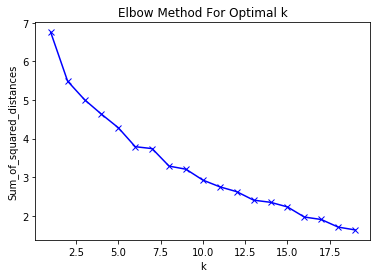

In [98]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

<a id='item7'></a>

# 7. Cluster The Neighborhoods

From the Figure above, K = 10 gave the best Elbow result and we shall use it as our K Value during clustering.

In [99]:
# set number of clusters
kclusters = 10

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Melbourne_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([7, 6, 6, 2, 6, 3, 6, 6, 7, 2], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 5 venues for each neighborhood.

In [100]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# Rename the column Neighborhood in Toronto Data to Neigborhoods, since we have a venue in Toronto named Neighborhood.
Neigh_data.rename(columns = {"Neighborhood" : "Neighborhoods"}, inplace = True)

Melbourne_merged = Neigh_data

# merge toronto_grouped with Toronto to add latitude/longitude for each neighborhood
Melbourne_merged = Melbourne_merged.join(neighborhoods_venues_sorted.set_index('Neighborhoods'), on='Neighborhoods')

Melbourne_merged.head()

,Main_ID,ID,Neighborhoods,sa3code,Area,Region,State,SQKM,Population,Median_age,Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,207031167,21167,Surrey Hills (East) - Mont Albert,20703,Whitehorse - West,Melbourne - Inner East,Victoria,3.3279,9965,40,2994.38,-37.824118,145.098621,7,Recreational Area,Burger Joint,Train Station,Café,Bakery
1,207031163,21163,Box Hill,20703,Whitehorse - West,Melbourne - Inner East,Victoria,7.0120,19828,33,2827.72,-37.813703,145.123805,3,Chinese Restaurant,Asian Restaurant,Korean Restaurant,Café,Dumpling Restaurant
2,207031164,21164,Box Hill North,20703,Whitehorse - West,Melbourne - Inner East,Victoria,6.2087,17552,38,2827.00,-37.805683,145.129575,6,Middle Eastern Restaurant,Italian Restaurant,Dance Studio,Café,Plaza
3,208011170,21170,Brighton East,20801,Bayside,Melbourne - Inner South,Victoria,5.6083,15838,43,2824.03,-37.917173,145.016366,7,Café,Gym / Fitness Center,Recreational Area,Thai Restaurant,Fish & Chips Shop
4,213051362,21362,Hoppers Crossing - South,21305,Wyndham,Melbourne - West,Victoria,7.0114,19477,36,2777.90,-37.857202,144.702253,3,Pizza Place,Grocery Store,Café,Indian Chinese Restaurant,Doctor's Office


In [101]:
Melbourne_merged.dropna(subset=["Cluster Labels"] , axis = 0 , inplace = True )

Melbourne_merged.reset_index(drop=True, inplace=True)

In [102]:
Melbourne_merged.head()

,Main_ID,ID,Neighborhoods,sa3code,Area,Region,State,SQKM,Population,Median_age,Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,207031167,21167,Surrey Hills (East) - Mont Albert,20703,Whitehorse - West,Melbourne - Inner East,Victoria,3.3279,9965,40,2994.38,-37.824118,145.098621,7,Recreational Area,Burger Joint,Train Station,Café,Bakery
1,207031163,21163,Box Hill,20703,Whitehorse - West,Melbourne - Inner East,Victoria,7.0120,19828,33,2827.72,-37.813703,145.123805,3,Chinese Restaurant,Asian Restaurant,Korean Restaurant,Café,Dumpling Restaurant
2,207031164,21164,Box Hill North,20703,Whitehorse - West,Melbourne - Inner East,Victoria,6.2087,17552,38,2827.00,-37.805683,145.129575,6,Middle Eastern Restaurant,Italian Restaurant,Dance Studio,Café,Plaza
3,208011170,21170,Brighton East,20801,Bayside,Melbourne - Inner South,Victoria,5.6083,15838,43,2824.03,-37.917173,145.016366,7,Café,Gym / Fitness Center,Recreational Area,Thai Restaurant,Fish & Chips Shop
4,213051362,21362,Hoppers Crossing - South,21305,Wyndham,Melbourne - West,Victoria,7.0114,19477,36,2777.90,-37.857202,144.702253,3,Pizza Place,Grocery Store,Café,Indian Chinese Restaurant,Doctor's Office


In [103]:
Melbourne_merged["Cluster Labels"] = Melbourne_merged["Cluster Labels"].astype("int")

In [104]:
Melbourne_merged["Cluster Labels"].value_counts()

7    11
2    11
6    10
3     8
5     2
1     2
9     1
8     1
4     1
0     1
Name: Cluster Labels, dtype: int64

In [105]:
for i in Melbourne_merged['ID'].index:
    for x in Neigh_data_raw['ID'].index:
        if Melbourne_merged['ID'][i] == Neigh_data_raw['ID'][x]:
            Melbourne_merged['Neighborhoods'][i] = Neigh_data_raw['Neighborhood'][x]
            
Melbourne_merged.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Main_ID,ID,Neighborhoods,sa3code,Area,Region,State,SQKM,Population,Median_age,Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,207031167,21167,Surrey Hills (East) - Mont Albert,20703,Whitehorse - West,Melbourne - Inner East,Victoria,3.3279,9965,40,2994.38,-37.824118,145.098621,7,Recreational Area,Burger Joint,Train Station,Café,Bakery
1,207031163,21163,Box Hill,20703,Whitehorse - West,Melbourne - Inner East,Victoria,7.0120,19828,33,2827.72,-37.813703,145.123805,3,Chinese Restaurant,Asian Restaurant,Korean Restaurant,Café,Dumpling Restaurant
2,207031164,21164,Box Hill North,20703,Whitehorse - West,Melbourne - Inner East,Victoria,6.2087,17552,38,2827.00,-37.805683,145.129575,6,Middle Eastern Restaurant,Italian Restaurant,Dance Studio,Café,Plaza
3,208011170,21170,Brighton East,20801,Bayside,Melbourne - Inner South,Victoria,5.6083,15838,43,2824.03,-37.917173,145.016366,7,Café,Gym / Fitness Center,Recreational Area,Thai Restaurant,Fish & Chips Shop
4,213051362,21362,Hoppers Crossing - South,21305,Wyndham,Melbourne - West,Victoria,7.0114,19477,36,2777.90,-37.857202,144.702253,3,Pizza Place,Grocery Store,Café,Indian Chinese Restaurant,Doctor's Office


In [106]:
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

Finally, let's visualize the resulting clusters

In [107]:
# create map of Melbourne using latitude and longitude values
Map_Melbourne = folium.Map(location=[latitude, longitude], zoom_start=10)

# add Neighborhood markers to map
for lat, lon, neigh, cluster in zip(Melbourne_merged['Latitude'], Melbourne_merged['Longitude'], Melbourne_merged['Neighborhoods'], Melbourne_merged['Cluster Labels']):
    label = label = '{}, cluster {}'.format(neigh, cluster)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1,
        parse_html=False).add_to(Map_Melbourne) 
    
Map_Melbourne

<a id='item8'></a>

# 8. Examine The Clusters

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster.

#### Cluster 0

In [108]:
Cluster_0 = Melbourne_merged.loc[Melbourne_merged['Cluster Labels'] == 0] 
Cluster_0[Cluster_0.columns[[1] + [2] + [4] + [5] + [9] + [10] + list(range(13, Melbourne_merged.shape[1]))]]

,ID,Neighborhoods,Area,Region,Median_age,Density,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
29,21302,Cranbourne North,Casey - South,Melbourne - South East,31,1963.98,0,Gas Station,Fast Food Restaurant,Grocery Store,Wine Shop,Farm


This Cluster 0 can be considered as an Outlier.

#### Cluster 1

In [109]:
Cluster_1 = Melbourne_merged.loc[Melbourne_merged['Cluster Labels'] == 1]
Cluster_1.reset_index(drop = True , inplace = True)
Cluster_1[Cluster_1.columns[[1] + [2] + [4] + [5] + [9] + [10] + list(range(13, Melbourne_merged.shape[1]))]]

,ID,Neighborhoods,Area,Region,Median_age,Density,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,21458,Narre Warren South (West),Casey - South,Melbourne - South East,32,2476.46,1,Supermarket,Video Store,Indian Restaurant,Grocery Store,Fast Food Restaurant
1,21452,Croydon South,Maroondah,Melbourne - Outer East,37,1650.91,1,American Restaurant,Video Store,Grocery Store,Fast Food Restaurant,Shopping Mall


We can see from this Cluster 1 that the common Venues are Fast-food Restaurants, Video Stores and Grocery Store, none of which are appealing to us.

#### Cluster 2

In [110]:
Cluster_2 = Melbourne_merged.loc[Melbourne_merged['Cluster Labels'] == 2]
Cluster_2.reset_index(drop = True , inplace = True)
Cluster_2[Cluster_2.columns[[1] + [2] + [4] + [5] + [9] + [10] + list(range(13, Melbourne_merged.shape[1]))]]

,ID,Neighborhoods,Area,Region,Median_age,Density,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,21196,Bundoora - East,Banyule,Melbourne - North East,39,2428.04,2,Pizza Place,Supermarket,Fast Food Restaurant,Indian Restaurant,Light Rail Station
1,21166,Burwood East,Whitehorse - West,Melbourne - Inner East,40,2409.81,2,Fast Food Restaurant,Café,Bakery,Gas Station,Supermarket
2,21454,Endeavour Hills - South,Casey - North,Melbourne - South East,38,2390.60,2,Supermarket,Department Store,Fast Food Restaurant,Food Truck,Discount Store
3,21267,Ringwood East,Maroondah,Melbourne - Outer East,39,2156.95,2,Café,Fast Food Restaurant,Bar,Fish & Chips Shop,Seafood Restaurant
4,21197,Greensborough,Banyule,Melbourne - North East,40,2026.56,2,Café,Mexican Restaurant,Fast Food Restaurant,Supermarket,Electronics Store
5,21451,Croydon - West,Maroondah,Melbourne - Outer East,40,1963.99,2,Fast Food Restaurant,Pizza Place,Australian Restaurant,Supermarket,Beer Garden
6,21361,Hoppers Crossing - North,Wyndham,Melbourne - West,35,1761.47,2,Fast Food Restaurant,Café,Portuguese Restaurant,Pizza Place,Dumpling Restaurant
7,21294,Berwick - South,Casey - North,Melbourne - South East,33,1736.83,2,Fast Food Restaurant,Café,Asian Restaurant,Shopping Mall,Bakery
8,21266,Ringwood,Maroondah,Melbourne - Outer East,37,1730.39,2,Supermarket,Fast Food Restaurant,Coffee Shop,Gastropub,Restaurant
9,21300,Cranbourne,Casey - South,Melbourne - South East,34,1542.49,2,Fast Food Restaurant,Café,Ice Cream Shop,Department Store,Grocery Store


Cluster 2 holds 11 of the Neighborhoods with the Common Venue Categories are mostly Cafes and restaurants. This Cluster might be appealing to start a business within these neighborhoods, but not what I am looking for to live in. 

#### Cluster 3

In [111]:
Cluster_3 = Melbourne_merged.loc[Melbourne_merged['Cluster Labels'] == 3]
Cluster_3.reset_index(drop = True , inplace = True)
Cluster_3[Cluster_3.columns[[1] + [2] + [4] + [5] + [9] + [10] + list(range(13, Melbourne_merged.shape[1]))]]

,ID,Neighborhoods,Area,Region,Median_age,Density,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,21163,Box Hill,Whitehorse - West,Melbourne - Inner East,33,2827.72,3,Chinese Restaurant,Asian Restaurant,Korean Restaurant,Café,Dumpling Restaurant
1,21362,Hoppers Crossing - South,Wyndham,Melbourne - West,36,2777.90,3,Pizza Place,Grocery Store,Café,Indian Chinese Restaurant,Doctor's Office
2,21465,Point Cook - North,Wyndham,Melbourne - West,33,2730.08,3,Supermarket,Pharmacy,Japanese Restaurant,Fish & Chips Shop,Shopping Mall
3,21204,Watsonia,Banyule,Melbourne - North East,39,2407.02,3,Grocery Store,Pizza Place,Australian Restaurant,Thai Restaurant,Wine Shop
4,21200,Ivanhoe,Banyule,Melbourne - North East,39,2255.49,3,Japanese Restaurant,Train Station,Pizza Place,Coffee Shop,Café
5,21295,Doveton,Casey - North,Melbourne - South East,34,2176.99,3,Fish & Chips Shop,Recreational Area,Grocery Store,Shopping Mall,Farm
6,21268,Ringwood North,Maroondah,Melbourne - Outer East,41,2013.23,3,Bakery,Asian Restaurant,Grocery Store,Shopping Mall,Coffee Shop
7,21203,Viewbank - Yallambie,Banyule,Melbourne - North East,40,1787.77,3,Fish Market,Supermarket,Pub,Grocery Store,Golf Course


Cluster 3 can be considered as the Cluster of Neighborhoods were the Most common Venues are Markets, mainly Supermarkets, and Grocery Stores. Definitely an interesting cluster of Neighborhoods, but I can barely see any recreational area within the clusters. 

#### Cluster 4

In [112]:
Cluster_4 = Melbourne_merged.loc[Melbourne_merged['Cluster Labels'] == 4]
Cluster_4.reset_index(drop = True , inplace = True)
Cluster_4[Cluster_4.columns[[1] + [2] + [4] + [5] + [9] + [10] + list(range(13, Melbourne_merged.shape[1]))]]

,ID,Neighborhoods,Area,Region,Median_age,Density,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,21455,Narre Warren - North East,Casey - North,Melbourne - South East,35,2751.13,4,Bus Stop,Recreational Area,Grocery Store,Wine Shop,Electronics Store


Cluster 4 is another Outlier.

#### Cluster 5

In [113]:
Cluster_5 = Melbourne_merged.loc[Melbourne_merged['Cluster Labels'] == 5]
Cluster_5.reset_index(drop = True , inplace = True)
Cluster_5[Cluster_5.columns[[1] + [2] + [4] + [5] + [9] + [10] + list(range(13, Melbourne_merged.shape[1]))]]

,ID,Neighborhoods,Area,Region,Median_age,Density,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,21457,Narre Warren South (East),Casey - South,Melbourne - South East,34,2109.51,5,Recreational Area,Wine Shop,Electronics Store,Food,Flower Shop
1,21466,Point Cook - South,Wyndham,Melbourne - West,31,1531.81,5,Recreational Area,Brewery,Farm,Food & Drink Shop,Food


Cluster 5 is a cluster of 2 Neighborhoods where the Most common Venue is a recreational Area, yet the rest of the common venues are not so appealing.

#### Cluster 6

In [114]:
Cluster_6 = Melbourne_merged.loc[Melbourne_merged['Cluster Labels'] == 6]
Cluster_6.reset_index(drop = True , inplace = True)
Cluster_6[Cluster_6.columns[[1] + [2] + [4] + [5] + [9] + [10] + list(range(13, Melbourne_merged.shape[1]))]]

,ID,Neighborhoods,Area,Region,Median_age,Density,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,21164,Box Hill North,Whitehorse - West,Melbourne - Inner East,38,2827.00,6,Middle Eastern Restaurant,Italian Restaurant,Dance Studio,Café,Plaza
1,21169,Brighton (Vic.),Bayside,Melbourne - Inner South,45,2767.51,6,Café,Convenience Store,Movie Theater,Chinese Restaurant,Restaurant
2,21173,Sandringham - Black Rock,Bayside,Melbourne - Inner South,45,2566.99,6,Café,Recreational Area,Pizza Place,Thai Restaurant,Sports Bar
3,21161,Blackburn,Whitehorse - West,Melbourne - Inner East,39,2484.05,6,Café,Hotel Bar,Sushi Restaurant,Grocery Store,Indian Restaurant
4,21165,Burwood,Whitehorse - West,Melbourne - Inner East,29,2430.54,6,Café,Light Rail Station,Gym,Gas Station,College Rec Center
5,21168,Beaumaris,Bayside,Melbourne - Inner South,46,2257.45,6,Café,Grocery Store,Chinese Restaurant,Sports Club,Recreational Area
6,21201,Ivanhoe East - Eaglemont,Banyule,Melbourne - North East,44,1798.27,6,Café,Pizza Place,Grocery Store,Italian Restaurant,Fast Food Restaurant
7,21145,Yarra - North,Yarra,Melbourne - Inner,36,1736.26,6,Café,Bar,Pub,Cocktail Bar,Gastropub
8,21297,Hallam,Casey - North,Melbourne - South East,35,1335.69,6,Convenience Store,Café,Train Station,Music Venue,Wine Shop
9,21293,Berwick - North,Casey - North,Melbourne - South East,42,1159.31,6,Café,Road,Supermarket,Grocery Store,Italian Restaurant


Cluster 6 can be considered as the Cluster of Neighborhoods were the Most common Venues are Cafes and Bars, another interesting cluster of Neighborhoods to start as business in but not what I am looking for.

#### Cluster 7

In [115]:
Cluster_7 = Melbourne_merged.loc[Melbourne_merged['Cluster Labels'] == 7]
Cluster_7.reset_index(drop = True , inplace = True)
Cluster_7[Cluster_7.columns[[1] + [2] + [4] + [5] + [9] + [10] + list(range(13, Melbourne_merged.shape[1]))]]

,ID,Neighborhoods,Area,Region,Median_age,Density,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,21167,Surrey Hills (East) - Mont Albert,Whitehorse - West,Melbourne - Inner East,40,2994.38,7,Recreational Area,Burger Joint,Train Station,Café,Bakery
1,21170,Brighton East,Bayside,Melbourne - Inner South,43,2824.03,7,Café,Gym / Fitness Center,Recreational Area,Thai Restaurant,Fish & Chips Shop
2,21467,Werribee - East,Wyndham,Melbourne - West,35,2560.43,7,Sports Bar,Football Stadium,Recreational Area,Gas Station,Wine Shop
3,21198,Heidelberg - Rosanna,Banyule,Melbourne - North East,39,2318.85,7,Greek Restaurant,Recreational Area,Miscellaneous Shop,Café,Pub
4,21199,Heidelberg West,Banyule,Melbourne - North East,35,2114.57,7,Recreational Area,Fish & Chips Shop,Convenience Store,Gym,Fried Chicken Joint
5,21306,Lynbrook - Lyndhurst,Casey - South,Melbourne - South East,32,2069.01,7,Recreational Area,Australian Restaurant,Burger Joint,Carpet Store,Shopping Mall
6,21171,Cheltenham - Highett (West),Bayside,Melbourne - Inner South,40,2056.09,7,Gym,Recreational Area,Dance Studio,Brewery,Italian Restaurant
7,21305,Hampton Park - Lynbrook,Casey - South,Melbourne - South East,33,1913.46,7,Gym / Fitness Center,Bakery,Burger Joint,Chinese Restaurant,Sandwich Place
8,21265,Croydon Hills - Warranwood,Maroondah,Melbourne - Outer East,39,1894.75,7,Tennis Court,Photography Studio,Recreational Area,Theater,Dumpling Restaurant
9,21202,Montmorency - Briar Hill,Banyule,Melbourne - North East,41,1338.23,7,Deli / Bodega,Italian Restaurant,Recreational Area,Restaurant,Bakery


Cluster 7 is a Cluster of 11 Neighborhoods were Recreational Areas can be found in within the Most 5 Common Venues across the Neighborhoods along with a selection of interesting other venues such as Cafes, Gyms, Restaurants, and other stores. This is Definitely an Interesting cluster of Neighborhoods to look for a place to live in.

#### Cluster 8

In [116]:
Cluster_8 = Melbourne_merged.loc[Melbourne_merged['Cluster Labels'] == 8] 
Cluster_8[Cluster_8.columns[[1] + [2] + [4] + [5] + [9] + [10] + list(range(13, Melbourne_merged.shape[1]))]]

,ID,Neighborhoods,Area,Region,Median_age,Density,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
46,21304,Cranbourne West,Casey - South,Melbourne - South East,30,1167.07,8,Construction & Landscaping,Recreational Area,Wine Shop,Electronics Store,Food


Cluster 8 is another Outlier.

#### Cluster 9

In [117]:
Cluster_9 = Melbourne_merged.loc[Melbourne_merged['Cluster Labels'] == 9] 
Cluster_9[Cluster_9.columns[[1] + [2] + [4] + [5] + [9] + [10] + list(range(13, Melbourne_merged.shape[1]))]]

,ID,Neighborhoods,Area,Region,Median_age,Density,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
32,21450,Croydon - East,Maroondah,Melbourne - Outer East,37,1874.74,9,Bar,Art Gallery,Athletics & Sports,Nightclub,Wine Shop


Cluster 9 is another Outlier.

Using the K-means Clustering method, we were able to identify 10 different clusters within our preferred neighborhoods and identify the most favourable cluster to our liking which is Cluster 7

<a id='item9'></a>

# 9. Exploring The Preferred Cluster

Now, we can further explore the preferred cluster and find out the location of each neighborhood and the proximity distance of the neighborhood location and the Schools within and the nearby Hospital and the venues. 

First we need to prepare the Hospital Data and School Data sets by adding the SA3Code to each school and hospital according to it's postcode.

In [118]:
SA3code = pd.DataFrame({'SA3Code' : [] , 'Latitude' : [] , 'Longitude' : []})
SA3code

,SA3Code,Latitude,Longitude


In [119]:
Schools_data = Schools_data.append(SA3code)
Schools_data.head()

,School,Postcode,State Overall Score,Total Enrolments,SA3Code,Latitude,Longitude
0,"Tintern Grammar,Ringwood East",3135.0,99.0,812.0,NaN,NaN,NaN
1,Melbourne Grammar School,3004.0,98.0,1795.0,NaN,NaN,NaN
2,"St Margaret's School,Berwick",3806.0,98.0,746.0,NaN,NaN,NaN
3,"Heathdale Christian College,Werribee",3030.0,98.0,1537.0,NaN,NaN,NaN
4,Mountain Gate Primary School,3156.0,98.0,404.0,NaN,NaN,NaN


In [120]:
Hospital_data = Hospital_data.append(SA3code)
Hospital_data.head()

,Hospital ID,Formal Name,Other Name,Emergency Capable,Location Address,Suburb,Postcode,Category,Agency Type,SA3Code,Latitude,Longitude
1,3485.0,Albury Wodonga Health,Albury Wodonga Health,YES,69 Vermont Street,Wodonga,3690.0,PUBLIC,Public Hospital,NaN,NaN,NaN
2,12990.0,"Albury Wodonga Health, Albury Campus","Albury Wodonga Health, Albury Campus",YES,Borella,Albury,2640.0,PUBLIC,Public Hospital,NaN,NaN,NaN
6,3483.0,Angliss Hospital,Angliss Hospital,YES,Albert Street,Upper Ferntree Gully,3156.0,PUBLIC,Public Hospital,NaN,NaN,NaN
9,11733.0,Austin Health - Austin Hospital,Austin Health - Austin Hospital,YES,145 Studley Road,Heidelberg,3084.0,PUBLIC,Public Hospital,NaN,NaN,NaN
11,6272.0,Bairnsdale Regional Health Service,Bairnsdale Regional Health Service,YES,122 Day St,Bairnsdale,3875.0,PUBLIC,Public Hospital,NaN,NaN,NaN


In [121]:
Schools_data[["Postcode" , "Total Enrolments"]] = Schools_data[["Postcode" , "Total Enrolments"]].astype("int")
Hospital_data[["Postcode" , "Hospital ID"]] = Hospital_data[["Postcode" , "Hospital ID"]].astype("int")

In [122]:
Schools_data.head()

,School,Postcode,State Overall Score,Total Enrolments,SA3Code,Latitude,Longitude
0,"Tintern Grammar,Ringwood East",3135,99.0,812,NaN,NaN,NaN
1,Melbourne Grammar School,3004,98.0,1795,NaN,NaN,NaN
2,"St Margaret's School,Berwick",3806,98.0,746,NaN,NaN,NaN
3,"Heathdale Christian College,Werribee",3030,98.0,1537,NaN,NaN,NaN
4,Mountain Gate Primary School,3156,98.0,404,NaN,NaN,NaN


In [123]:
Hospital_data.head()

,Hospital ID,Formal Name,Other Name,Emergency Capable,Location Address,Suburb,Postcode,Category,Agency Type,SA3Code,Latitude,Longitude
1,3485,Albury Wodonga Health,Albury Wodonga Health,YES,69 Vermont Street,Wodonga,3690,PUBLIC,Public Hospital,NaN,NaN,NaN
2,12990,"Albury Wodonga Health, Albury Campus","Albury Wodonga Health, Albury Campus",YES,Borella,Albury,2640,PUBLIC,Public Hospital,NaN,NaN,NaN
6,3483,Angliss Hospital,Angliss Hospital,YES,Albert Street,Upper Ferntree Gully,3156,PUBLIC,Public Hospital,NaN,NaN,NaN
9,11733,Austin Health - Austin Hospital,Austin Health - Austin Hospital,YES,145 Studley Road,Heidelberg,3084,PUBLIC,Public Hospital,NaN,NaN,NaN
11,6272,Bairnsdale Regional Health Service,Bairnsdale Regional Health Service,YES,122 Day St,Bairnsdale,3875,PUBLIC,Public Hospital,NaN,NaN,NaN


In [124]:
for i in Schools_data['SA3Code'].index:
    Schools_data['SA3Code'][i] = Aus_data.sa3[Aus_data['postcode'] == Schools_data['Postcode'][i]].unique()[0]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [125]:
for i in Hospital_data['SA3Code'].index:
    Hospital_data['SA3Code'][i] = Aus_data.sa3[Aus_data['postcode'] == Hospital_data['Postcode'][i]].unique()[0]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [126]:
Schools_data[["SA3Code"]] = Schools_data[["SA3Code"]].astype("int")
Hospital_data[["SA3Code"]] = Hospital_data[["SA3Code"]].astype("int")

In [127]:
Cluster_7_sa3codes = Cluster_7['sa3code'].tolist()

In [128]:
for i in Schools_data['SA3Code'].index:
    if Schools_data['SA3Code'][i] in Cluster_7_sa3codes:
        print (Schools_data['School'][i])
    else:
        Schools_data.drop(index = i , inplace = True)

Tintern Grammar,Ringwood East
St Margaret's School,Berwick
Heathdale Christian College,Werribee
Sandringham East Primary School
Banyule Primary School,Rosanna
Kingswood College,Box Hill
Alamanda K-9 College,Point Cook
Heidelberg Primary School
Brentwood Park Primary School
Heathmont East Primary School
Viewbank Primary School
St Francis Xavier's Parish Primary School,Box Hill
Sacred Heart School,Sandringham
Sandringham Primary School
St Martin of Tours School,Rosanna
Rosanna Golf Links Primary School
Great Ryrie Primary School


In [129]:
for i in Hospital_data['SA3Code'].index:
    if Hospital_data['SA3Code'][i] in Cluster_7_sa3codes:
        print (Hospital_data['Formal Name'][i])
    else:
        Hospital_data.drop(index = i , inplace = True)

Austin Health - Austin Hospital
Box Hill Hospital
Casey Hospital
Maroondah Hospital
Mercy Hospital for Women
Sandringham Hospital
Werribee Mercy Hospital


Reset the index of both the School Data and Hospital data sets

In [130]:
Schools_data.reset_index(drop=True, inplace=True)

In [131]:
Hospital_data.reset_index(drop=True, inplace=True)

Now lets find the Latitude and Longitude Values for each School and Hospital.

In [132]:
for i in Schools_data['School'].index:
    address = str(Schools_data['School'][i] + ', Australia')
    geolocator = Nominatim(user_agent="Australia")
    location = geolocator.geocode(address)
    if(location != None):
        Schools_data['Latitude'][i] = location.latitude
        Schools_data['Longitude'][i] = location.longitude
    else:
        Schools_data['Latitude'][i] = None
        Schools_data['Longitude'][i] = None

    print(i)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0
1
2
3
4
5
6
7
8
9
10


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


11
12
13
14
15
16


In [133]:
for i in Hospital_data['Formal Name'].index:
    address = str(Hospital_data['Formal Name'][i] + ', Australia')
    geolocator = Nominatim(user_agent="Australia")
    location = geolocator.geocode(address)
    if(location != None):
        Hospital_data['Latitude'][i] = location.latitude
        Hospital_data['Longitude'][i] = location.longitude
    else:
        Hospital_data['Latitude'][i] = None
        Hospital_data['Longitude'][i] = None

    print(i)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


0


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


1
2
3
4
5
6


Lets explore the dataframes to find the missing values and input them manually.

In [134]:
Schools_data

,School,Postcode,State Overall Score,Total Enrolments,SA3Code,Latitude,Longitude
0,"Tintern Grammar,Ringwood East",3135,99.0,812,21103,-37.815606,145.259169
1,"St Margaret's School,Berwick",3806,98.0,746,21203,-38.035940,145.348075
2,"Heathdale Christian College,Werribee",3030,98.0,1537,21305,-37.881246,144.680586
3,Sandringham East Primary School,3191,97.0,534,20801,-37.956147,145.022388
4,"Banyule Primary School,Rosanna",3084,97.0,691,20901,-37.743058,145.077757
5,"Kingswood College,Box Hill",3128,97.0,582,20703,-37.832523,145.119176
6,"Alamanda K-9 College,Point Cook",3030,97.0,2624,21305,-37.908479,144.740420
7,Heidelberg Primary School,3084,97.0,574,20901,-37.754884,145.068374
8,Brentwood Park Primary School,3806,96.0,927,21203,-38.052408,145.347355
9,Heathmont East Primary School,3135,96.0,635,21103,-37.830615,145.257252


In [135]:
Schools_data['Latitude'][11] = -37.817316
Schools_data['Longitude'][11] = 145.131844
Schools_data['Latitude'][14] = -37.735181
Schools_data['Longitude'][14] = 145.077195

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [136]:
Hospital_data

,Hospital ID,Formal Name,Other Name,Emergency Capable,Location Address,Suburb,Postcode,Category,Agency Type,SA3Code,Latitude,Longitude
0,11733,Austin Health - Austin Hospital,Austin Health - Austin Hospital,YES,145 Studley Road,Heidelberg,3084,PUBLIC,Public Hospital,20901,NaN,NaN
1,3403,Box Hill Hospital,Box Hill Hospital,YES,51 Nelson Road,Box Hill,3128,PUBLIC,Public Hospital,20703,-37.813615,145.118405
2,12280,Casey Hospital,Casey Hospital,YES,52 Kangan Drive,Berwick,3806,PUBLIC,Public Hospital,21203,-38.044615,145.347431
3,3416,Maroondah Hospital,Maroondah Hospital,YES,1-15 Mt Dandenong Rd,East Ringwood,3135,PUBLIC,Public Hospital,21103,-37.807144,145.254462
4,11607,Mercy Hospital for Women,Mercy Hospital for Women,YES,163 Studley Road,Heidelberg,3084,PUBLIC,Denominational Hospital,20901,-37.755895,145.060946
5,3425,Sandringham Hospital,Sandringham Hospital,YES,193 Bluff Road,Sandringham,3191,PUBLIC,Public Hospital,20801,-37.950301,145.004388
6,3389,Werribee Mercy Hospital,Werribee Mercy Hospital,YES,300 Princes Highway,Werribee,3030,PUBLIC,Denominational Hospital,21305,-37.887128,144.697714


In [137]:
Hospital_data['Latitude'][0] = -37.756009
Hospital_data['Longitude'][0] = 145.059304

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Next we extract our Preferred Clsuer from the Melbourne Merged Dataframe

In [138]:
Cluster_7.head()

,Main_ID,ID,Neighborhoods,sa3code,Area,Region,State,SQKM,Population,Median_age,Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,207031167,21167,Surrey Hills (East) - Mont Albert,20703,Whitehorse - West,Melbourne - Inner East,Victoria,3.3279,9965,40,2994.38,-37.824118,145.098621,7,Recreational Area,Burger Joint,Train Station,Café,Bakery
1,208011170,21170,Brighton East,20801,Bayside,Melbourne - Inner South,Victoria,5.6083,15838,43,2824.03,-37.917173,145.016366,7,Café,Gym / Fitness Center,Recreational Area,Thai Restaurant,Fish & Chips Shop
2,213051467,21467,Werribee - East,21305,Wyndham,Melbourne - West,Victoria,7.7569,19861,35,2560.43,-37.907848,144.642097,7,Sports Bar,Football Stadium,Recreational Area,Gas Station,Wine Shop
3,209011198,21198,Heidelberg - Rosanna,20901,Banyule,Melbourne - North East,Victoria,6.3717,14775,39,2318.85,-37.757249,145.112821,7,Greek Restaurant,Recreational Area,Miscellaneous Shop,Café,Pub
4,209011199,21199,Heidelberg West,20901,Banyule,Melbourne - North East,Victoria,6.6912,14149,35,2114.57,-37.738243,145.043392,7,Recreational Area,Fish & Chips Shop,Convenience Store,Gym,Fried Chicken Joint


In [139]:
print ('....................................................................')
for i in Cluster_7['sa3code'].index:
    print(' ')
    print('Neighborhood Name: ' + Cluster_7['Neighborhoods'][i])
    print('1st Most Common Venue: ' + Cluster_7['1st Most Common Venue'][i])
    print('2nd Most Common Venue: ' + Cluster_7['2nd Most Common Venue'][i])
    print('3rd Most Common Venue: ' + Cluster_7['3rd Most Common Venue'][i])
    print('4th Most Common Venue: ' + Cluster_7['4th Most Common Venue'][i])
    print('5th Most Common Venue: ' + Cluster_7['5th Most Common Venue'][i])
    print('Population Density: ' + str(Cluster_7['Density'][i]))
    for x in Schools_data['SA3Code'].index:
        if Schools_data['SA3Code'][x] == Cluster_7['sa3code'][i]:
            print ('School Name : ' + Schools_data['School'][x])
    for y in Hospital_data['SA3Code'].index:
        if Hospital_data['SA3Code'][y] == Cluster_7['sa3code'][i]:
            print ('Hospital Name : ' + Hospital_data['Formal Name'][y])
    print(' ')
    print ('....................................................................')

....................................................................
 
Neighborhood Name: Surrey Hills (East) - Mont Albert
1st Most Common Venue: Recreational Area
2nd Most Common Venue: Burger Joint
3rd Most Common Venue: Train Station
4th Most Common Venue: Café
5th Most Common Venue: Bakery
Population Density: 2994.38
School Name : Kingswood College,Box Hill
School Name : St Francis Xavier's Parish Primary School,Box Hill
Hospital Name : Box Hill Hospital
 
....................................................................
 
Neighborhood Name: Brighton East
1st Most Common Venue: Café
2nd Most Common Venue: Gym / Fitness Center
3rd Most Common Venue: Recreational Area
4th Most Common Venue: Thai Restaurant
5th Most Common Venue: Fish & Chips Shop
Population Density: 2824.03
School Name : Sandringham East Primary School
School Name : Sacred Heart School,Sandringham
School Name : Sandringham Primary School
Hospital Name : Sandringham Hospital
 
.....................................

Now lets represent this on the Map of Melbourne to get a better idea of the location of each Neighborhood and the schools in the area the Hospitals serving the neighborhood.

In [140]:
address = 'Melbourne, Australia'

geolocator = Nominatim(user_agent="Australia")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Melbourne are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Melbourne are -37.8142176, 144.9631608.


In [143]:
# create map of Melbourne using latitude and longitude values
Map_Melbourne = folium.Map(location=[latitude, longitude], zoom_start=10)

# add Neighborhoods markers to map
for lat, lng, name, den, ind in zip(Cluster_7['Latitude'], Cluster_7['Longitude'], Cluster_7['Neighborhoods'], Cluster_7['Density'], Cluster_7['Neighborhoods'].index):
    label = '{}, {}, {}'.format(ind, name, den)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity = 0.7,
        parse_html=False).add_to(Map_Melbourne)
    
# add Schools markers to map
for lat, lng, name, rat in zip(Schools_data['Latitude'], Schools_data['Longitude'], Schools_data['School'], Schools_data['State Overall Score'].index):
    label = '{}, {}'.format(name, rat)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity = 0.7,
        parse_html=False).add_to(Map_Melbourne)
    
# add Schools markers to map
for lat, lng, name, cat in zip(Hospital_data['Latitude'], Hospital_data['Longitude'], Hospital_data['Formal Name'], Hospital_data['Category'].index):
    label = '{}, {}'.format(name, cat)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity = 0.7,
        parse_html=False).add_to(Map_Melbourne)
    
    
Map_Melbourne

From our Results, we conclude the following:
1. The Top locations to that fit our preferences are the following Neighborhoods:
    - Surrey Hills (East)
    - Brighton East
    - Heidelberg - Rosanna
    - Heidelberg West
    - Cheltenham - Highett West
    - Croydon Hills
    - Bayswater North
2. The remaining 4 Neighborhoods also fit our preferences but are located far away from the nearest Hospital and Primary Schools, yet within the same Postcode or SA3Code.

Project Ended !!

by Wael Sarriss